In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt

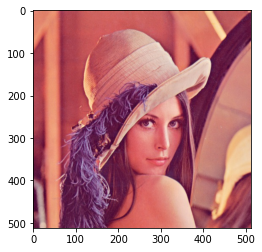

In [ ]:
path = '/content/drive/MyDrive/Image Processing/lena.png'
img = cv2.imread(path, cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
print("MAX int:", img.max())
print("MIN int:", img.min())
print("Image Dimension:", img.shape)

MAX int: 255
MIN int: 0
Image Dimension: (512, 512, 3)


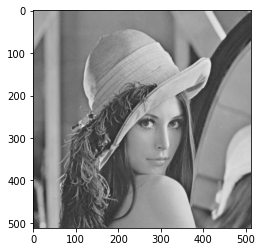

In [ ]:
img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

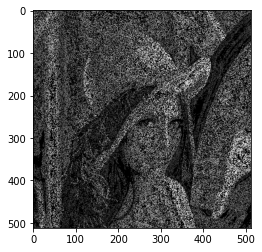

In [ ]:
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if (img[i,j]%2==0):
      img[i,j]= 0 #img.itemset((i,j),0)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

LabWork

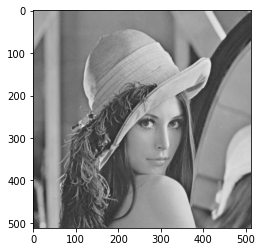

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

path = '/content/drive/MyDrive/Image Processing/lena.png'

img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

512 512
(514, 514)


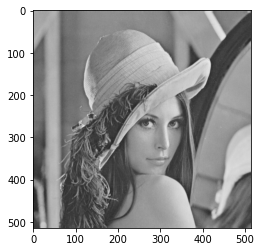

In [ ]:
im_H = img.shape[0]
im_W = img.shape[1]

print(im_H, im_W)

kernel = np.array(([0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]),np.float32)

imgreplicate = cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REPLICATE)
print(imgreplicate.shape)
plt.imshow(cv2.cvtColor(imgreplicate, cv2.COLOR_BGR2RGB))
plt.show()

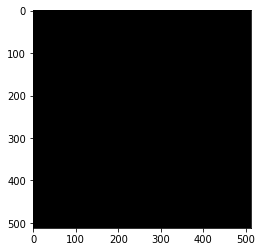

512

In [ ]:
result = np.zeros((im_H,im_W), dtype="float32")

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()
result.shape[0]
result.shape[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0.64705884 0.67058825 0.67058825 ... 0.74509805 0.6313726  0.46666667]
 [0.6431373  0.67058825 0.6745098  ... 0.8352941  0.6431373  0.43137255]
 [0.654902   0.67058825 0.654902   ... 0.75686276 0.64705884 0.42745098]
 ...
 [0.18431373 0.1764706  0.28627452 ... 0.46666667 0.44313726 0.4392157 ]
 [0.20784314 0.16470589 0.31764707 ... 0.48235294 0.47058824 0.4745098 ]
 [0.20784314 0.15686275 0.34509805 ... 0.47058824 0.47843137 0.50980395]]


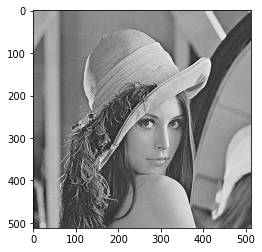

In [ ]:
from operator import itemgetter
sum = 0.0

for i in range(result.shape[0]):
  for j in range(result.shape[1]):
    sum = 0.0
    for x in range(kernel.shape[0]):
      for y in range(kernel.shape[1]):
        sum=sum+(imgreplicate[i+x,j+y] * kernel[x,y])

    result[i,j]=sum/255

print (result)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

[[163 171 171 ... 186 160 100]
 [162 171 172 ... 213 164  86]
 [166 171 167 ... 193 165  85]
 ...
 [ 47  45  73 ... 119 113 112]
 [ 53  42  81 ... 123 120 122]
 [ 53  40  90 ... 120 124 137]]


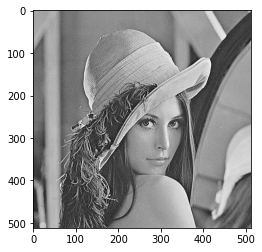

In [ ]:
result = cv2.filter2D(img, -1, kernel)

print (result)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

Assignment

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

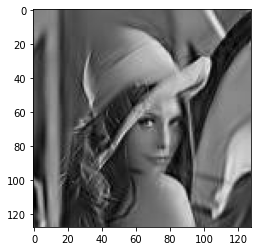

In [3]:
path = '/content/drive/MyDrive/Image Processing/lena 128.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
kernel = np.array(([0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]),
                  np.float32)
kernel_H = kernel.shape[0]
H = (kernel_H-1)//2
kernel_W = kernel.shape[1]
W = (kernel_W-1)//2

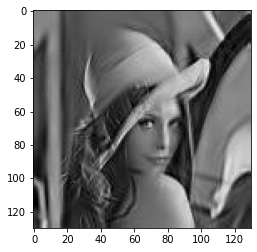

In [5]:
padImg = cv2.copyMakeBorder(img,H,H,W,W, cv2.BORDER_REPLICATE)
plt.imshow(cv2.cvtColor(padImg, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
I_row_num, I_col_num = img.shape
F_row_num, F_col_num = kernel.shape

In [7]:
output_row_num = I_row_num + F_row_num - 1
output_col_num = I_col_num + F_col_num - 1
output_shape = output_row_num, output_col_num
print(output_row_num, output_col_num)

130 130


In [8]:
F_zero_padded = np.pad(kernel, ((output_row_num-F_row_num,0),
                                (0,output_col_num-F_col_num)),
                       'constant', constant_values = 0)
print(F_zero_padded)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0. -1.  0. ...  0.  0.  0.]
 [-1.  5. -1. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]]


In [9]:
import scipy.linalg as sl
toeplitz_list = []
for i in range(F_zero_padded.shape[0]-1, -1, -1):
  c = F_zero_padded[i,:]
  r = np.r_[c[0], np.zeros(I_col_num-1)]
  toeplitz_m = sl.toeplitz(c,r)
  toeplitz_list.append(toeplitz_m)

In [10]:
c = range(1, F_zero_padded.shape[0]+1)
r = np.r_[c[0], np.zeros(img.shape[0]-1, dtype=int)]
doubly_indices = sl.toeplitz(c,r)
print(doubly_indices)

[[  1   0   0 ...   0   0   0]
 [  2   1   0 ...   0   0   0]
 [  3   2   1 ...   0   0   0]
 ...
 [128 127 126 ...   3   2   1]
 [129 128 127 ...   4   3   2]
 [130 129 128 ...   5   4   3]]


In [11]:
h = toeplitz_list[0].shape[0]*doubly_indices.shape[0]
w = toeplitz_list[0].shape[1]*doubly_indices.shape[1]
doubly_blocked_shape = [h, w]
doubly_blocked = np.zeros(doubly_blocked_shape)

In [12]:
b_h, b_w = toeplitz_list[0].shape
for i in range(doubly_indices.shape[0]):
  for j in range(doubly_indices.shape[1]):
    start_i = i*b_h
    start_j = j*b_w
    end_i = start_i+b_h
    end_j = start_j + b_w
    doubly_blocked[start_i: end_i, start_j: end_j]=toeplitz_list[doubly_indices[i,j]-1]
print(doubly_blocked)
print(doubly_blocked.shape)

[[ 0.  0.  0. ...  0.  0.  0.]
 [-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0. -1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]]
(16900, 16384)


In [13]:
def matrix_to_vector(input):
  input_h, input_w = input.shape
  output_vector = np.zeros(input_h*input_w, dtype=np.float32)
  #flip the input matrix upside down to start from the last row
  input = np.flipud(input)
  for i, row in enumerate(input):
    st = i*input_w
    nd = st+input_w
    output_vector[st:nd]=row
  return output_vector

In [14]:
vectorized_input = matrix_to_vector(img)
print(doubly_blocked.shape)
print(vectorized_input.shape)
print(vectorized_input)
result_vector = np.matmul(doubly_blocked, vectorized_input)
print("result: ", result_vector)

(16900, 16384)
(16384,)
[ 61.  35.  42. ... 100. 129. 138.]
result:  [   0.  -61.  -35. ... -129. -138.    0.]


In [16]:
def vector_to_matrix(input, output_shape):
  output_h, output_w = output_shape
  output = np.zeros(output_shape, dtype=np.float32)
  for i in range(output_h):
    st = i*output_w
    nd = st+output_w
    output[i,:] = input[st:nd]
  #flipping again downup
  output = np.flipud(output/255)
  return output
out = vector_to_matrix(result_vector,  output_shape)

Input Image: 



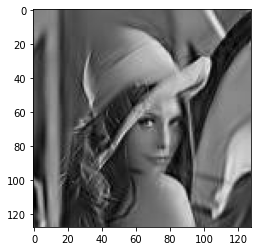

Output Image: 



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


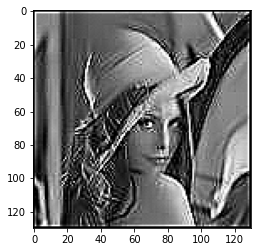

In [17]:
print("Input Image: \n")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
print("Output Image: \n")
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Output Image: 



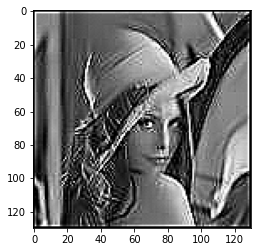

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Using convolve2D: 



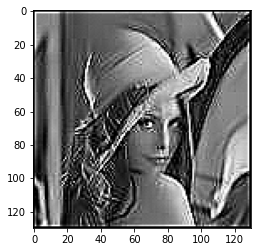

In [18]:
print("Output Image: \n")
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.show()
from scipy import signal
result = signal.convolve2d(img, kernel, "full")/255
print("Using convolve2D: \n")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
I = np.array([[1,2,3],
             [4,5,6]])
F = np.array([[10,20],
              [30,40]])

In [20]:
I_row_num, I_col_num = I.shape
F_row_num, F_col_num = F.shape

output_row_num = I_row_num + F_row_num-1
output_col_num = I_col_num + F_col_num-1
output_shape = output_row_num, output_col_num

In [21]:
F_zero_padded = np.pad(F, ((output_row_num-F_row_num, 0),
                           (0,output_col_num-F_col_num)),
                       'constant', constant_values=0)
print(F_zero_padded)

[[ 0  0  0  0]
 [10 20  0  0]
 [30 40  0  0]]


In [22]:
import scipy.linalg as sl
toeplitz_list = []
for i in range(F_zero_padded.shape[0]-1, -1,-1):
  c = F_zero_padded[i,:];
  r = np.r_[c[0], np.zeros(I_col_num-1)]
  toeplitz_m = sl.toeplitz(c,r)
  toeplitz_list.append(toeplitz_m)

In [23]:
c = range(1, F_zero_padded.shape[0]+1)
r = np.r_[c[0], np.zeros(I_row_num-1, dtype=int)]
doubly_indices = sl.toeplitz(c,r)
print(c)
print(r)
print('Doubly Indices\n' , doubly_indices)

range(1, 4)
[1 0]
Doubly Indices
 [[1 0]
 [2 1]
 [3 2]]


In [24]:
h = toeplitz_list[0].shape[0]*doubly_indices.shape[0]
w = toeplitz_list[0].shape[1]*doubly_indices.shape[1]
doubly_blocked_shape = [h, w]
doubly_blocked = np.zeros(doubly_blocked_shape)

In [25]:
b_h, b_w = toeplitz_list[0].shape
for i in range(doubly_indices.shape[0]):
  for j in range(doubly_indices.shape[1]):
    start_i = i*b_h
    start_j = j*b_w
    end_i  = start_i + b_h
    end_j = start_j + b_w
    doubly_blocked[start_i: end_i, start_j: end_j]=toeplitz_list[doubly_indices[i,j]-1]
print(doubly_blocked)
print(doubly_blocked.shape)

[[30.  0.  0.  0.  0.  0.]
 [40. 30.  0.  0.  0.  0.]
 [ 0. 40. 30.  0.  0.  0.]
 [ 0.  0. 40.  0.  0.  0.]
 [10.  0.  0. 30.  0.  0.]
 [20. 10.  0. 40. 30.  0.]
 [ 0. 20. 10.  0. 40. 30.]
 [ 0.  0. 20.  0.  0. 40.]
 [ 0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0. 20. 10.  0.]
 [ 0.  0.  0.  0. 20. 10.]
 [ 0.  0.  0.  0.  0. 20.]]
(12, 6)


In [26]:
def matrix_to_vector(input):
  input_h, input_w = input.shape
  output_vector = np.zeros(input_h*input_w, dtype=input.dtype)
  #flip the input matrix upside down
  input = np.flipud(input)
  for i, row in enumerate(input):
    st = i*input_w
    nd = st+input_w
    output_vector[st:nd]=row
  return output_vector
print(matrix_to_vector(I))

[4 5 6 1 2 3]


In [27]:
vectorized_input = matrix_to_vector(I)
print(vectorized_input.shape)
print(vectorized_input)
result_vector = np.matmul(doubly_blocked, vectorized_input)
print("result: ", result_vector)

(6,)
[4 5 6 1 2 3]
result:  [120. 310. 380. 240.  70. 230. 330. 240.  10.  40.  70.  60.]


In [28]:
def vector_to_matrix(input, output_shape):
  output_h, output_w = output_shape
  output = np.zeros(output_shape, dtype=input.dtype)
  for i in range(output_h):
    st = i*output_w
    nd = st+output_w
    output[i,:] = input[st:nd]

  output = np.flipud(output)
  return output
out = vector_to_matrix(result_vector,  output_shape)
print(out)

[[ 10.  40.  70.  60.]
 [ 70. 230. 330. 240.]
 [120. 310. 380. 240.]]


In [29]:
from scipy import signal
result = signal.convolve2d(I, F, "full")
print(result)

[[ 10  40  70  60]
 [ 70 230 330 240]
 [120 310 380 240]]
